In [2]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [3]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv", delimiter=",")
df.shape

(70692, 22)

In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
x= df[['HighBP','HighChol','BMI','Stroke','HeartDiseaseorAttack','GenHlth','Age']].values
x[:5]

array([[ 1.,  0., 26.,  0.,  0.,  3.,  4.],
       [ 1.,  1., 26.,  1.,  0.,  3., 12.],
       [ 0.,  0., 26.,  0.,  0.,  1., 13.],
       [ 1.,  1., 28.,  0.,  0.,  3., 11.],
       [ 0.,  0., 29.,  0.,  0.,  2.,  8.]])

In [6]:
y = df['Diabetes_binary']
y[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

In [7]:
correlations = df.corr()
print(correlations['Diabetes_binary'].sort_values(ascending=False))

Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)


In [10]:
diabtree= DecisionTreeClassifier(criterion="entropy",max_depth=7)
diabtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [11]:
pre_x= diabtree.predict(x_test)
print(pre_x[:5])

print(y_test[:5])

[1. 1. 0. 1. 1.]
44967    1.0
20220    0.0
23944    0.0
2707     0.0
42356    1.0
Name: Diabetes_binary, dtype: float64


In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [13]:
print("Accuracy " ,metrics.accuracy_score(y_test,pre_x))

Accuracy  0.7387540315735869


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test,pre_x))

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      8830
         1.0       0.72      0.78      0.75      8843

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



In [16]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pre_x, labels=[1,0]))

[[6875 1968]
 [2649 6181]]


Confusion matrix, without normalization
[[6875 1968]
 [2649 6181]]


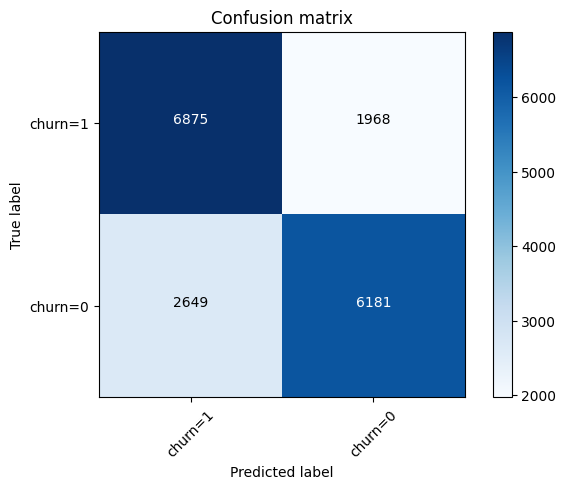

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pre_x, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [18]:
pre_probability_x = diabtree.predict_proba(x_test)
pre_probability_x[:5]

array([[0.44, 0.56],
       [0.43, 0.57],
       [0.63, 0.37],
       [0.47, 0.53],
       [0.35, 0.65]])